In [1]:
import numpy as np
import os
import pickle
import trueskill

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns
%matplotlib inline

In [2]:
# Customize matplotlib appearance
sns.set_style("white", {'axes.grid': False, 'grid.color': '.9', 'grid.linestyle': u'--'})
matplotlib.rc('axes', titlesize=18, labelsize=18)
matplotlib.rc('legend', fontsize=16)
matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16)

# matplotlib.rc('text', usetex=True)
matplotlib.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

## Load results

In [3]:
runs = 5

# Naive learners
rets_nl, times_nl, params_nl = {}, {}, {}
for bs in [64]:
    rets_nl[bs] = np.stack([np.load("results/ipd_bs%d_nl/run-%d/rets.npy" % (bs, r + 1)) for r in range(runs)])
    times_nl[bs] = np.stack([np.load("results/ipd_bs%d_nl/run-%d/times.npy" % (bs, r + 1)) for r in range(runs)])
    params_nl[bs] = np.stack([np.load("results/ipd_bs%d_nl/run-%d/params.npy" % (bs, r + 1)) for r in range(runs)])

# LOLA with corrections
rets_old, times_old, params_old = {}, {}, {}
for bs in [64]:
    rets_old[bs] = np.stack([np.load("results/ipd_bs%d_original/run-%d/rets.npy" % (bs, r + 1))[:200] for r in range(runs)])
    params_old[bs] = np.stack([np.load("results/ipd_bs%d_original/run-%d/params.npy" % (bs, r + 1))[:200] for r in range(runs)])

# LOLA without magic
rets_nomagic, times_nomagic, params_nomagic = {}, {}, {}
for bs in [64]:
    rets_nomagic[bs] = np.stack([np.load("results/ipd_bs%d_nomagic/run-%d/rets.npy" % (bs, r + 1)) for r in range(runs)])
    times_nomagic[bs] = np.stack([np.load("results/ipd_bs%d_nomagic/run-%d/times.npy" % (bs, r + 1)) for r in range(runs)])
    params_nomagic[bs] = np.stack([np.load("results/ipd_bs%d_nomagic/run-%d/params.npy" % (bs, r + 1)) for r in range(runs)])

# LOLA with magic
rets_magic, times_magic, params_magic = {}, {}, {}
for bs in [64]:
    rets_magic[bs] = np.stack([np.load("results/ipd_bs%d_magic/run-%d/rets.npy" % (bs, r + 1)) for r in range(runs)])
    times_magic[bs] = np.stack([np.load("results/ipd_bs%d_magic/run-%d/times.npy" % (bs, r + 1)) for r in range(runs)])
    params_magic[bs] = np.stack([np.load("results/ipd_bs%d_magic/run-%d/params.npy" % (bs, r + 1)) for r in range(runs)])

rets_2steps_magic, times_2steps_magic, params_2steps_magic = {}, {}, {}
for bs in [64]:
    rets_2steps_magic[bs] = np.stack([np.load("results/ipd_bs%d_2inner/run-%d/rets.npy" % (bs, r + 1)) for r in range(runs)])
    times_2steps_magic[bs] = np.stack([np.load("results/ipd_bs%d_2inner/run-%d/times.npy" % (bs, r + 1)) for r in range(runs)])
    params_2steps_magic[bs] = np.stack([np.load("results/ipd_bs%d_2inner/run-%d/params.npy" % (bs, r + 1)) for r in range(runs)])

rets_3steps_magic, times_3steps_magic, params_3steps_magic = {}, {}, {}
for bs in [64]:
    rets_3steps_magic[bs] = np.stack([np.load("results/ipd_bs%d_3inner/run-%d/rets.npy" % (bs, r + 1)) for r in range(runs)])
    times_3steps_magic[bs] = np.stack([np.load("results/ipd_bs%d_3inner/run-%d/times.npy" % (bs, r + 1)) for r in range(runs)])
    params_3steps_magic[bs] = np.stack([np.load("results/ipd_bs%d_3inner/run-%d/params.npy" % (bs, r + 1)) for r in range(runs)])

# LOLA with magic and OM
rets_2steps_magic_om, times_2steps_magic_om, params_2steps_magic_om = {}, {}, {}
for bs in [64]:
    rets_2steps_magic_om[bs] = np.stack([np.load("results/ipd_bs%d_2inner_om/run-%d/rets.npy" % (bs, r + 1)) for r in range(runs)])
    times_2steps_magic_om[bs] = np.stack([np.load("results/ipd_bs%d_2inner_om/run-%d/times.npy" % (bs, r + 1)) for r in range(runs)])
    params_2steps_magic_om[bs] = np.stack([np.load("results/ipd_bs%d_2inner_om/run-%d/params.npy" % (bs, r + 1)) for r in range(runs)])

## Plot results

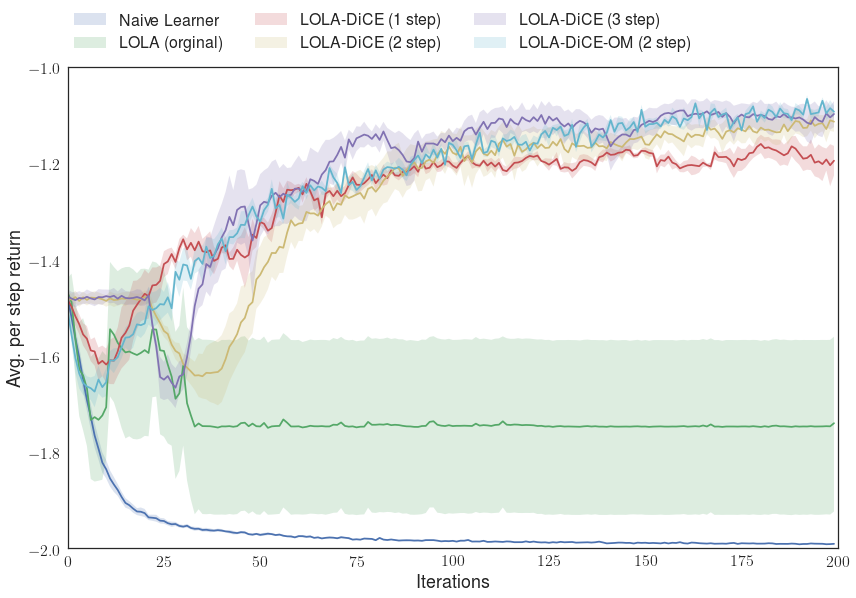

In [4]:
bs = 64

fig, ax = plt.subplots(1, 1, figsize=(12., 9.))
colors = sns.color_palette('deep')

# NL
sns.tsplot((rets_nl[bs][:, :, 0] + rets_nl[bs][:, :, 1]) / 2, color=colors[0], ci=68, ax=ax)

# LOLA + gradient corrections
sns.tsplot((rets_old[bs][:, :, 0] + rets_old[bs][:, :, 1]) / 2, color=colors[1], ci=68, ax=ax)


# LOLA + magic
sns.tsplot((rets_magic[bs][:, :, 0] + rets_magic[bs][:, :, 1]) / 2, color=colors[2], ci=68, ax=ax)
sns.tsplot((rets_2steps_magic[bs][:, :, 0] + rets_2steps_magic[bs][:, :, 1]) / 2, color=colors[4], ci=68, ax=ax)
sns.tsplot((rets_3steps_magic[bs][:, :, 0] + rets_3steps_magic[bs][:, :, 1]) / 2, color=colors[3], ci=68, ax=ax)
sns.tsplot((rets_2steps_magic_om[bs][:, :, 0] + rets_2steps_magic_om[bs][:, :, 1]) / 2, color=colors[5], ci=68, ax=ax)

ax.set_xlim([0, 200])
ax.set_ylim([-2., -1.])
ax.set_ylabel("Avg. per step return")
ax.set_xlabel("Iterations")
lg = ax.legend([
    "Naive Learner",
    "LOLA (orginal)",
    "LOLA-DiCE (1 step)",
    "LOLA-DiCE (2 step)",
    "LOLA-DiCE (3 step)",
    "LOLA-DiCE-OM (2 step)"
], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=3, borderaxespad=0)

fig.tight_layout(rect=[0, 0, 1, .85])
fig.savefig("lola-results.pdf")